# Load Image

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import importlib
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

In [23]:
cat = Image.open('images/cat1.jpeg').convert('L')
cat.save('images/cat1_gray.jpeg')

In [24]:
cat.size

(1350, 900)

[[200 200 200 ... 197 197 198]
 [200 200 200 ... 198 198 199]
 [201 201 201 ... 198 198 199]
 ...
 [206 205 204 ... 188 189 182]
 [206 207 203 ... 184 190 178]
 [205 206 203 ... 183 182 174]]


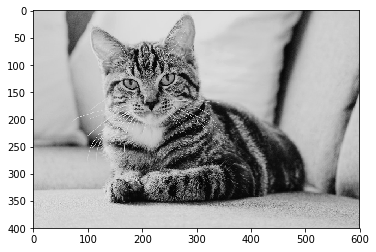

In [25]:
A = np.array(cat.resize([600, 400]))
# A = np.array(cat)
print(A)
plt.imshow(A, cmap='gray')
plt.show()

[[0.78431373 0.78431373 0.78431373 ... 0.77254902 0.77254902 0.77647059]
 [0.78431373 0.78431373 0.78431373 ... 0.77647059 0.77647059 0.78039216]
 [0.78823529 0.78823529 0.78823529 ... 0.77647059 0.77647059 0.78039216]
 ...
 [0.80784314 0.80392157 0.8        ... 0.7372549  0.74117647 0.71372549]
 [0.80784314 0.81176471 0.79607843 ... 0.72156863 0.74509804 0.69803922]
 [0.80392157 0.80784314 0.79607843 ... 0.71764706 0.71372549 0.68235294]]


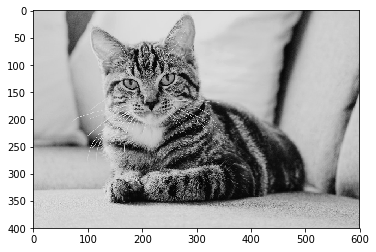

In [26]:
B = A/255
print(B)
plt.imshow(B, cmap='gray')
plt.show()

# Inpainting

In [55]:
%run inpainting.py

In [53]:
M = np.zeros_like(B).reshape(-1)
M[:M.shape[0]//2] = 1
np.random.shuffle(M)
M = M.reshape(B.shape)
print(M)

[[1. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]]


In [56]:
M = generate_mask(B.shape)

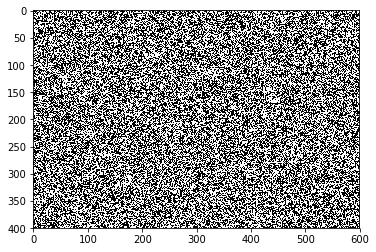

In [57]:
plt.imshow(M, cmap='gray')
plt.show()

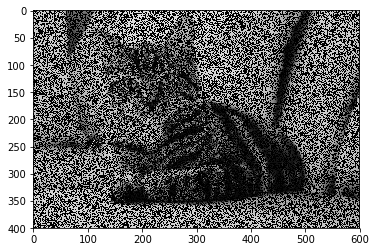

In [58]:
Y = M * B
plt.imshow(Y, cmap='gray', vmin=np.min(B), vmax=np.max(B))
plt.show()

In [59]:
cat_masked = Image.fromarray(np.uint8(Y*255))
cat_masked.save('images/cat1_gray_masked.jpeg')

## Gradient

In [8]:
import torch

In [51]:
Bt = torch.zeros(B.shape, requires_grad=True)
Mt = torch.tensor(M, requires_grad=False, dtype=torch.float)
Yt = torch.tensor(Y, requires_grad=False, dtype=torch.float)

loss = torch.sum((Yt - Bt*Mt)**2)

In [54]:
loss.backward(retain_graph=True)

In [12]:
Yt

tensor([[0.0000, 0.0000, 0.7843,  ..., 0.0000, 0.0000, 0.0000],
        [0.7843, 0.0000, 0.0000,  ..., 0.7725, 0.0000, 0.0000],
        [0.0000, 0.7843, 0.0000,  ..., 0.7765, 0.7804, 0.0000],
        ...,
        [0.0000, 0.0000, 0.8118,  ..., 0.7059, 0.0000, 0.0000],
        [0.7961, 0.0000, 0.8078,  ..., 0.0000, 0.6824, 0.0000],
        [0.0000, 0.7961, 0.0000,  ..., 0.6745, 0.6784, 0.6824]])

In [55]:
Bt.grad

tensor([[-0.0000, -0.0000, -1.5686,  ..., -0.0000, -0.0000, -0.0000],
        [-1.5686, -0.0000, -0.0000,  ..., -1.5451, -0.0000, -0.0000],
        [-0.0000, -1.5686, -0.0000,  ..., -1.5529, -1.5608, -0.0000],
        ...,
        [-0.0000, -0.0000, -1.6235,  ..., -1.4118, -0.0000, -0.0000],
        [-1.5922, -0.0000, -1.6157,  ..., -0.0000, -1.3647, -0.0000],
        [-0.0000, -1.5922, -0.0000,  ..., -1.3490, -1.3569, -1.3647]])

In [14]:
Yt

tensor([[0.0000, 0.0000, 0.7843,  ..., 0.0000, 0.0000, 0.0000],
        [0.7843, 0.0000, 0.0000,  ..., 0.7725, 0.0000, 0.0000],
        [0.0000, 0.7843, 0.0000,  ..., 0.7765, 0.7804, 0.0000],
        ...,
        [0.0000, 0.0000, 0.8118,  ..., 0.7059, 0.0000, 0.0000],
        [0.7961, 0.0000, 0.8078,  ..., 0.0000, 0.6824, 0.0000],
        [0.0000, 0.7961, 0.0000,  ..., 0.6745, 0.6784, 0.6824]])

In [15]:
C = -1/2*Bt.grad

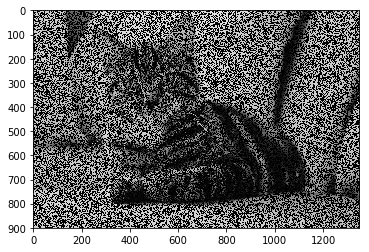

In [16]:
plt.imshow(C, cmap='gray')
plt.show()

In [17]:
torch.all(C == Yt)

tensor(1, dtype=torch.uint8)

## Wavelet

In [18]:
import pywt

In [19]:
B_wav = pywt.wavedec2(B, 'db4')

In [20]:
len(B_wav)

8

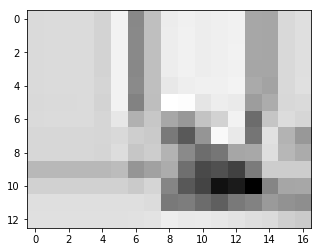

In [21]:
plt.imshow(B_wav[0], cmap='gray')
plt.show()

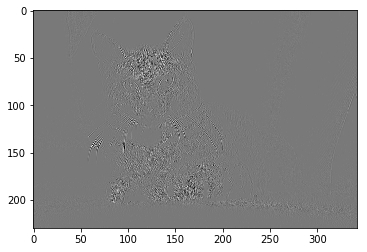

In [22]:
plt.imshow(B_wav[6][1], cmap='gray')
plt.show()

In [23]:
from numba import njit

In [24]:
@njit
def soft_thresholding(x, th):
    return np.sign(x) * np.maximum(np.abs(x)-th, 0)

In [25]:
soft_thresholding(B_wav[0], 20)

array([[80.24553827, 80.4480518 , 80.47103275, 80.76444947, 77.74654172,
        90.49543713, 44.74150127, 68.61500979, 88.14879492, 89.87211026,
        88.42565037, 89.48641808, 90.26000259, 57.92002243, 57.61439252,
        79.57910571, 82.22022846],
       [80.2345343 , 80.43745722, 80.46030553, 80.75384313, 77.73987204,
        90.46607777, 44.85153341, 68.43513004, 88.28881745, 89.9936188 ,
        88.54735836, 89.42716056, 90.38948613, 58.07523479, 57.52545683,
        79.58258847, 82.26599061],
       [80.25460019, 80.45756813, 80.48036329, 80.77411469, 77.76028812,
        90.48425337, 44.84395629, 68.37524896, 88.30156966, 90.00948664,
        88.56678411, 89.45117944, 90.4054583 , 57.9924356 , 57.5418364 ,
        79.58534723, 82.26388796],
       [80.23674073, 80.43969973, 80.46270112, 80.75755271, 77.73371679,
        90.4890268 , 44.70543845, 68.525884  , 88.55224336, 90.09559405,
        88.25128639, 89.40370307, 90.12932803, 57.81119694, 57.72239516,
        79.59202703

In [72]:
#@njit(parallel=True)
def wv_soft(x_wav, th):
    # x_wav[0] = soft_thresholding(x_wav[0], th)
    for i, coeffs in enumerate(x_wav):
        cH = soft_thresholding(coeffs[0], th)
        cV = soft_thresholding(coeffs[1], th)
        cD = soft_thresholding(coeffs[2], th)
        x_wav[i] = cH, cV, cD
    return x_wav

In [27]:
from copy import deepcopy

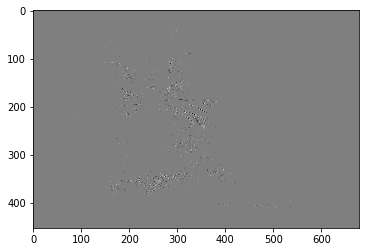

In [28]:
B_wav_c = deepcopy(B_wav)
B_wav_c_th = wv_soft(B_wav_c[1:], 0.1)
plt.imshow(B_wav_c_th[6][0], cmap='gray')
plt.show()

In [29]:
# with numba
%timeit B_wav_c_th = wv_soft(B_wav_c[1:], 0.1)

1000 loops, best of 3: 1.61 ms per loop


In [33]:
%load_ext line_profiler

In [43]:
def wv_soft2(x_wav, th):
    # x_wav[0] = soft_thresholding(x_wav[0], th)
    for i, coeffs in enumerate(x_wav):
        cH = soft_thresholding(coeffs[0], th)
        cV = soft_thresholding(coeffs[1], th)
        cD = soft_thresholding(coeffs[2], th)
        x_wav[i] = cH, cV, cD
    return x_wav

In [180]:
#without numba
%timeit B_wav_c_th = wv_soft2(B_wav_c[1:], 0.1)

1000 loops, best of 3: 1.29 ms per loop


In [44]:
%lprun -f wv_soft2 B_wav_c_th = wv_soft2(B_wav_c[1:], 0.1)

In [73]:
def wavelet_soft_thresholding(x, th, wavelet='db4'):
    x_wav = pywt.wavedec2(x, wavelet)
    x_wav[0] = soft_thresholding(x_wav[0], th)
    x_wav[1:] = wv_soft(x_wav[1:], th)
    return pywt.waverec2(x_wav, wavelet)

In [171]:
# with numba
%timeit B_th = wavelet_soft_thresholding(B, 0.1)

10 loops, best of 3: 68.3 ms per loop


In [164]:
# without numba
%timeit B_th = wavelet_soft_thresholding(B, 0.1)

10 loops, best of 3: 68.3 ms per loop


In [45]:
%lprun -f wavelet_soft_thresholding B_th = wavelet_soft_thresholding(B, 0.1)

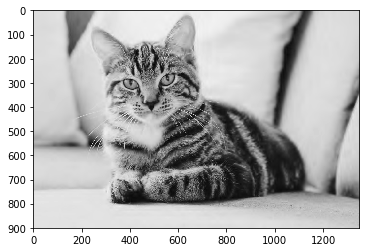

In [169]:
plt.imshow(B_th, cmap='gray')

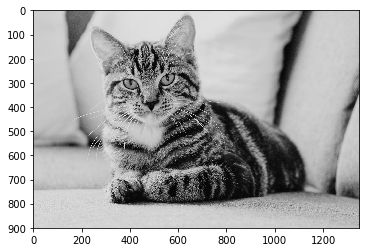

In [154]:
plt.imshow(B, cmap='gray')

## Forward Backward

In [190]:
import torch.optim

In [191]:
gamma = 1
lamb = 0.02
n_iters = 100

In [192]:
Bt = torch.zeros(B.shape, requires_grad=True)
Mt = torch.tensor(M, requires_grad=False, dtype=torch.float)
Yt = torch.tensor(Y, requires_grad=False, dtype=torch.float)

loss = torch.sum((Yt - Bt*Mt)**2)
optimizer = torch.optim.SGD([Bt], lr=0.1)

In [193]:
for _ in range(n_iters):
    optimizer.zero_grad()
    loss = torch.sum((Yt - Bt*Mt)**2)
    loss.backward(retain_graph=True)
    optimizer.step()
    Bt.data = torch.tensor(wavelet_soft_thresholding(Bt.detach().numpy(), lamb*gamma), dtype=torch.float)

In [196]:
Bt.data

tensor([[ 0.7874,  0.7874,  0.7874,  ...,  0.5482,  0.3652, -0.2160],
        [ 0.7874,  0.7874,  0.7874,  ...,  0.6822,  0.3881, -0.5125],
        [ 0.7874,  0.7874,  0.7874,  ...,  0.7157,  0.5652, -0.1942],
        ...,
        [ 0.8016,  0.8016,  0.8016,  ...,  0.6095,  0.5645,  0.5042],
        [ 0.8016,  0.8016,  0.8016,  ...,  0.6214,  0.5830,  0.5240],
        [ 0.8015,  0.8015,  0.8015,  ...,  0.6715,  0.6783,  0.6873]])

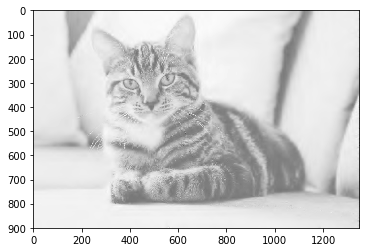

In [184]:
plt.imshow(Bt.detach().numpy(), cmap='gray')

In [185]:
cat_restored = Image.fromarray(np.uint8(Bt.detach().numpy()*255))

In [186]:
cat_restored.save('images/cat1_gray_inpainting.jpeg')

In [160]:
Bt.size()

torch.Size([900, 1350])

In [153]:
Bt.detach().numpy()

array([[0.7883644 , 0.7884659 , 0.78857195, ..., 0.7803347 , 0.7814696 ,
        0.7826551 ],
       [0.78835744, 0.7884595 , 0.788566  , ..., 0.7803188 , 0.7814521 ,
        0.78263605],
       [0.78835046, 0.788453  , 0.78856003, ..., 0.7803029 , 0.7814346 ,
        0.7826169 ],
       ...,
       [0.80260384, 0.8026107 , 0.80261755, ..., 0.6902525 , 0.6888523 ,
        0.6874285 ],
       [0.80271137, 0.80271834, 0.80272526, ..., 0.6902207 , 0.6888157 ,
        0.6873868 ],
       [0.8028704 , 0.8028774 , 0.80288434, ..., 0.6902803 , 0.6888614 ,
        0.68741804]], dtype=float32)

In [ ]:
class ForwardBackward(object):
    
    def __init__(self, gamma=0.1):
        self.gamma = gamma

In [59]:
Bt.grad

tensor([[-0.0000, -0.0000, -3.1373,  ..., -0.0000, -0.0000, -0.0000],
        [-3.1373, -0.0000, -0.0000,  ..., -3.0902, -0.0000, -0.0000],
        [-0.0000, -3.1373, -0.0000,  ..., -3.1059, -3.1216, -0.0000],
        ...,
        [-0.0000, -0.0000, -3.2471,  ..., -2.8235, -0.0000, -0.0000],
        [-3.1843, -0.0000, -3.2314,  ..., -0.0000, -2.7294, -0.0000],
        [-0.0000, -3.1843, -0.0000,  ..., -2.6980, -2.7137, -2.7294]])

In [205]:
torch.rand([20, 2]).type()

'torch.FloatTensor'

In [208]:
Bt.clone()

tensor([[ 0.7874,  0.7874,  0.7874,  ...,  0.5482,  0.3652, -0.2160],
        [ 0.7874,  0.7874,  0.7874,  ...,  0.6822,  0.3881, -0.5125],
        [ 0.7874,  0.7874,  0.7874,  ...,  0.7157,  0.5652, -0.1942],
        ...,
        [ 0.8016,  0.8016,  0.8016,  ...,  0.6095,  0.5645,  0.5042],
        [ 0.8016,  0.8016,  0.8016,  ...,  0.6214,  0.5830,  0.5240],
        [ 0.8015,  0.8015,  0.8015,  ...,  0.6715,  0.6783,  0.6873]],
       grad_fn=<CloneBackward>)

## Test

In [186]:
import importlib
importlib.reload(proximal)
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [297]:
%run inpainting.py

In [372]:
inp_fb = Inpainting(Y, M)

In [373]:
inp_fb.run(100, 0.1, 0.02, 'db4')  #, err_levels=lambda k: 2e4/(k**0.2))

tensor([[0.5031, 0.8871, 0.1611,  ..., 0.7756, 0.6082, 0.7620],
        [0.6576, 0.8376, 0.4403,  ..., 0.7651, 0.7731, 0.7618],
        [0.7615, 0.7826, 0.5268,  ..., 0.7436, 0.7827, 0.7755],
        ...,
        [0.5919, 0.7663, 0.7881,  ..., 0.6201, 0.6962, 0.7183],
        [0.6060, 0.7769, 0.7869,  ..., 0.7071, 0.6002, 0.7259],
        [0.6801, 0.7952, 0.7985,  ..., 0.7115, 0.7306, 0.8179]],
       device='cuda:0', requires_grad=True)

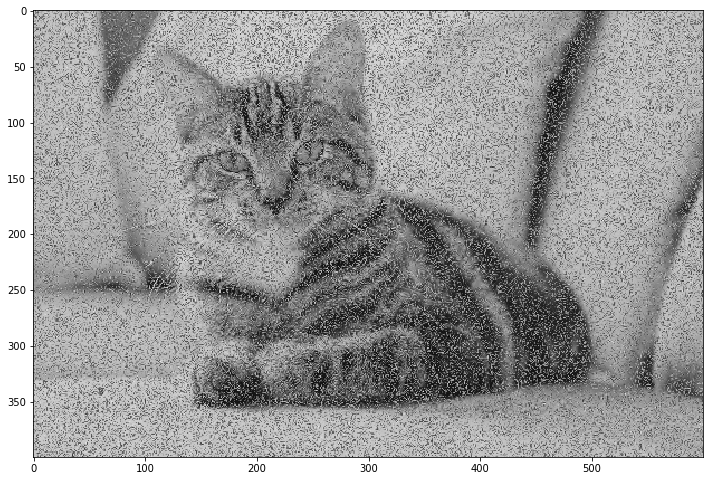

In [374]:
plt.figure(figsize=(12, 18))
plt.imshow(inp_fb.x.cpu().detach(), cmap='gray')

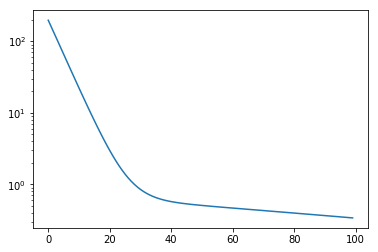

In [344]:
plt.plot(inp_fb.x_diffs)
plt.yscale('log')

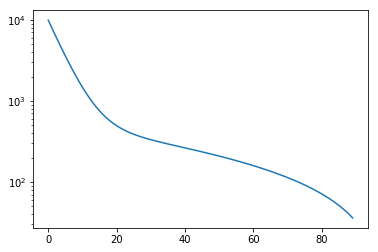

In [345]:
energies = np.array(inp_fb.energies)
plt.plot((energies-np.min(energies))[:-10])
plt.yscale('log')

In [264]:
alpha = fista.Alpha(3)

In [365]:
inp_fista = Inpainting(Y, M)

In [366]:
inp_fista.run(100, 0.1, 0.02, 'db4', alpha)  #, err_levels=lambda k: 2e4/(k**0.2))

tensor([[0.7880, 0.7882, 0.7883,  ..., 0.7725, 0.7727, 0.7731],
        [0.7868, 0.7883, 0.7886,  ..., 0.7725, 0.7712, 0.7685],
        [0.7884, 0.7882, 0.7881,  ..., 0.7725, 0.7740, 0.7770],
        ...,
        [0.8439, 0.8127, 0.8073,  ..., 0.7414, 0.7230, 0.7008],
        [0.8522, 0.8127, 0.8040,  ..., 0.7405, 0.7344, 0.6827],
        [0.8530, 0.8100, 0.7978,  ..., 0.7261, 0.7172, 0.7066]],
       device='cuda:0', requires_grad=True)

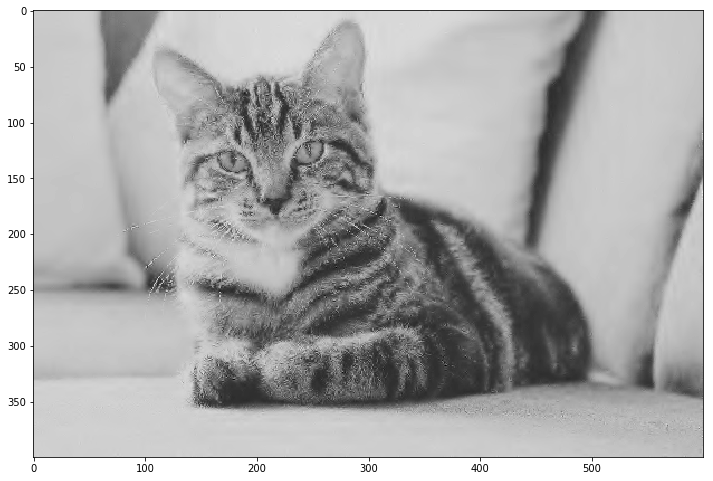

In [367]:
plt.figure(figsize=(12, 18))
plt.imshow(inp_fista.x.cpu().detach(), cmap='gray')

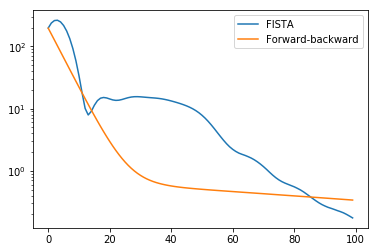

In [375]:
plt.plot(inp_fista.x_diffs, label='FISTA')
plt.plot(inp_fb.x_diffs, label='Forward-backward')
plt.yscale('log')
plt.legend()

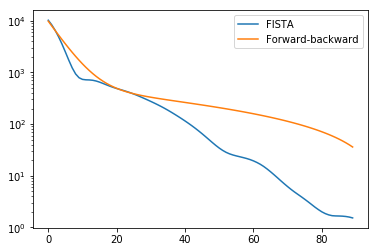

In [376]:
energies = np.array(inp_fista.energies)
plt.plot((energies-np.min(energies))[:-10], label='FISTA')

energies = np.array(inp_fb.energies)
plt.plot((energies-np.min(energies))[:-10], label='Forward-backward')

plt.yscale('log')
plt.legend()

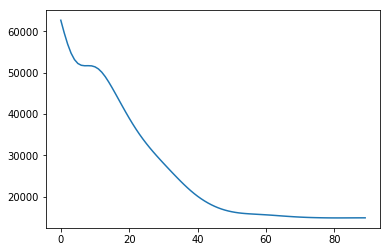

In [340]:
energies_l1 = np.array(inp_fista.l1s)
plt.plot(energies_l1[:-10])

# plt.yscale('log')

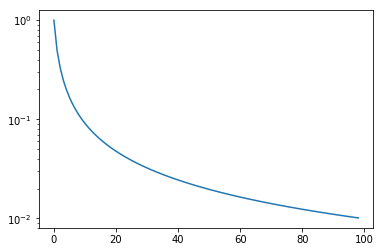

In [45]:
plt.plot(1/np.arange(1, 100))
plt.yscale('log')

# Deblurring

## Gaussian Filter

In [91]:
%run deblurring.py

In [25]:
blurring = GaussianSmoothing(5, 1)

In [26]:
blurring.weight

tensor([[[[0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
          [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
          [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
          [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
          [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]]]])

In [8]:
from scipy.ndimage import gaussian_filter

In [10]:
In = np.zeros([5, 5])
In[2, 2] = 1
print(In)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [38]:
gaussian_filter(In, sigma=1, mode='constant')

array([[0.00291504, 0.01306431, 0.02153941, 0.01306431, 0.00291504],
       [0.01306431, 0.05855018, 0.09653293, 0.05855018, 0.01306431],
       [0.02153941, 0.09653293, 0.15915589, 0.09653293, 0.02153941],
       [0.01306431, 0.05855018, 0.09653293, 0.05855018, 0.01306431],
       [0.00291504, 0.01306431, 0.02153941, 0.01306431, 0.00291504]])

In [27]:
blurring(torch.tensor(In, dtype=torch.float))

tensor([[[[0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
          [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
          [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
          [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
          [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]]]])

In [28]:
from scipy.stats import multivariate_normal

In [37]:
multivariate_normal([0, 0]).pdf([2, 2])

0.002915024465028194

In [39]:
G = gaussian_filter(In, sigma=1, mode='constant')

In [43]:
G/np.sum(G)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [51]:
Bb = gaussian_filter(B, sigma=4, mode='constant')

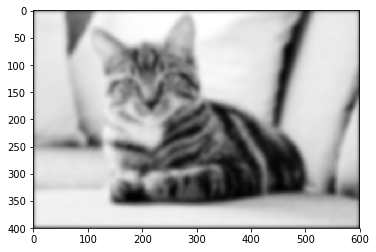

In [52]:
plt.imshow(Bb, cmap='gray')

In [92]:
blurring = GaussianSmoothing(19, 3)

In [224]:
blurring.weight

tensor([[[[2.1888e-06, 5.6282e-06, 1.2950e-05, 2.6665e-05, 4.9129e-05,
           8.1000e-05, 1.1950e-04, 1.5777e-04, 1.8638e-04, 1.9703e-04,
           1.8638e-04, 1.5777e-04, 1.1950e-04, 8.1000e-05, 4.9129e-05,
           2.6665e-05, 1.2950e-05, 5.6282e-06, 2.1888e-06],
          [5.6282e-06, 1.4472e-05, 3.3300e-05, 6.8565e-05, 1.2633e-04,
           2.0828e-04, 3.0729e-04, 4.0568e-04, 4.7925e-04, 5.0663e-04,
           4.7925e-04, 4.0568e-04, 3.0729e-04, 2.0828e-04, 1.2633e-04,
           6.8565e-05, 3.3300e-05, 1.4472e-05, 5.6282e-06],
          [1.2950e-05, 3.3300e-05, 7.6623e-05, 1.5777e-04, 2.9068e-04,
           4.7925e-04, 7.0706e-04, 9.3346e-04, 1.1028e-03, 1.1658e-03,
           1.1028e-03, 9.3346e-04, 7.0706e-04, 4.7925e-04, 2.9068e-04,
           1.5777e-04, 7.6623e-05, 3.3300e-05, 1.2950e-05],
          [2.6665e-05, 6.8565e-05, 1.5777e-04, 3.2484e-04, 5.9852e-04,
           9.8679e-04, 1.4558e-03, 1.9220e-03, 2.2706e-03, 2.4003e-03,
           2.2706e-03, 1.9220e-03, 1.45

In [93]:
blurring(torch.tensor(B, dtype=torch.float))

tensor([[0.2524, 0.3085, 0.3560,  ..., 0.3506, 0.3038, 0.2486],
        [0.3087, 0.3774, 0.4354,  ..., 0.4285, 0.3713, 0.3038],
        [0.3565, 0.4358, 0.5028,  ..., 0.4944, 0.4283, 0.3505],
        ...,
        [0.3639, 0.4444, 0.5123,  ..., 0.4536, 0.3918, 0.3197],
        [0.3152, 0.3849, 0.4437,  ..., 0.3957, 0.3419, 0.2789],
        [0.2578, 0.3148, 0.3628,  ..., 0.3254, 0.2811, 0.2294]])

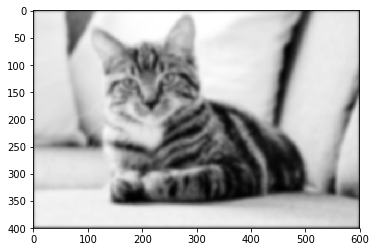

In [94]:
plt.imshow(blurring(torch.tensor(B, dtype=torch.float)).squeeze(), cmap='gray')

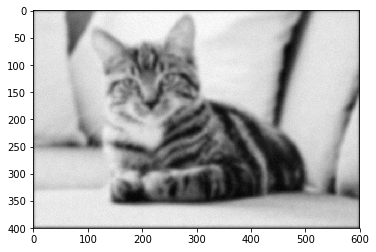

In [95]:
Bb = blurring(torch.tensor(B, dtype=torch.float))
Bbn = Bb.numpy() + np.random.randn(*B.shape)*0.01
plt.imshow(Bbn, cmap='gray')

## Test

In [98]:
%run deblurring.py

In [102]:
alpha = fista.Alpha(4)

In [377]:
deblurring_fb = Deblurring(Bbn, 19, 3)

In [380]:
deblurring_fb.run(200, 0.5, 0.01, 'db12')

tensor([[0.7872, 0.7872, 0.7872,  ..., 0.7772, 0.7773, 0.7773],
        [0.7873, 0.7873, 0.7874,  ..., 0.7771, 0.7772, 0.7773],
        [0.7874, 0.7875, 0.7876,  ..., 0.7769, 0.7770, 0.7771],
        ...,
        [0.7931, 0.7936, 0.7935,  ..., 0.7055, 0.7040, 0.7032],
        [0.7958, 0.7902, 0.7864,  ..., 0.7060, 0.7046, 0.7038],
        [0.7791, 0.7978, 0.8052,  ..., 0.7063, 0.7048, 0.7040]],
       device='cuda:0', requires_grad=True)

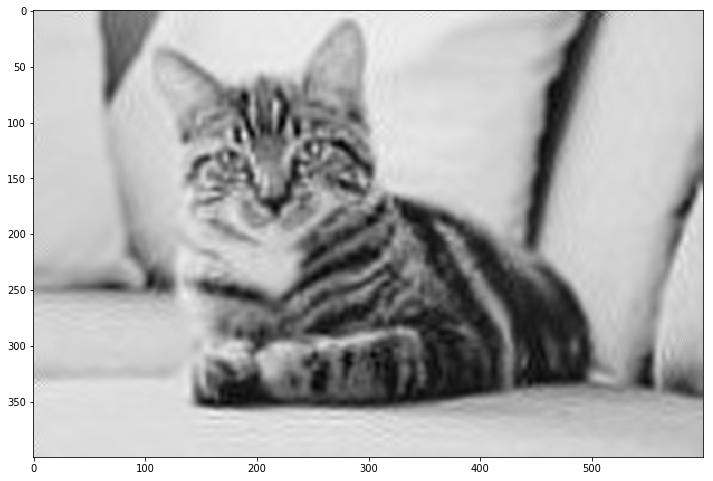

In [381]:
plt.figure(figsize=(12, 18))
plt.imshow(deblurring_fb.x.cpu().detach(), cmap='gray')

In [382]:
deblurring = Deblurring(Bbn, 19, 3)

In [387]:
deblurring.run(50, 0.5, 0.01, 'db12', alpha)

tensor([[0.5131, 0.7405, 0.9119,  ..., 0.7775, 0.7776, 0.7777],
        [0.5942, 0.8394, 0.9958,  ..., 0.7774, 0.7775, 0.7777],
        [0.7256, 0.9005, 0.9886,  ..., 0.7772, 0.7773, 0.7775],
        ...,
        [0.7939, 0.7937, 0.7937,  ..., 0.7060, 0.7045, 0.7038],
        [0.7928, 0.7926, 0.7926,  ..., 0.7068, 0.7054, 0.7047],
        [0.7922, 0.7920, 0.7920,  ..., 0.7070, 0.7057, 0.7050]],
       device='cuda:0', requires_grad=True)

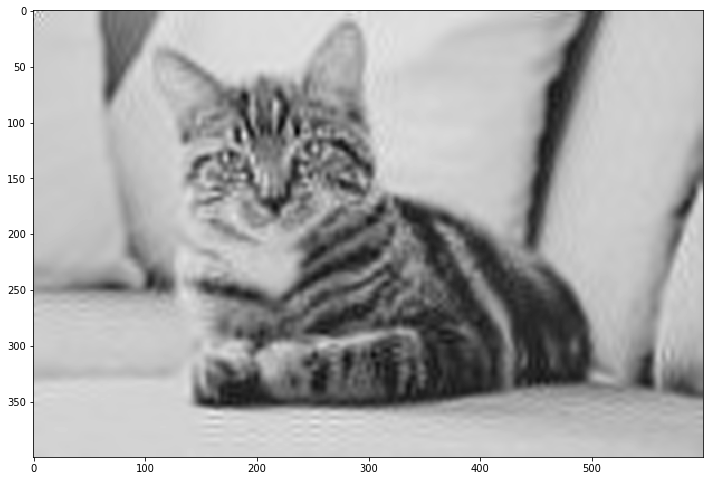

In [388]:
plt.figure(figsize=(12, 18))
plt.imshow(deblurring.x.cpu().detach(), cmap='gray')

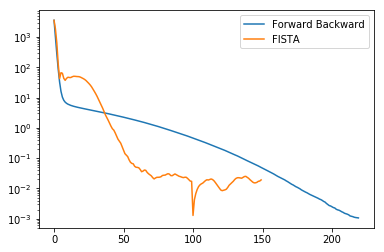

In [389]:
plt.plot(deblurring_fb.x_diffs, label='Forward Backward')
plt.plot(deblurring.x_diffs, label='FISTA')
plt.yscale('log')
plt.legend()

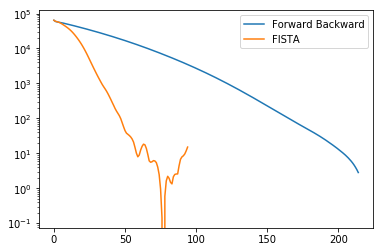

In [386]:
energies = np.array(deblurring_fb.energies)
plt.plot((energies-np.min(energies))[:-5], label='Forward Backward')

energies = np.array(deblurring.energies)
plt.plot((energies-np.min(energies))[:-5], label='FISTA')
plt.yscale('log')
plt.legend()

In [361]:
deb = deblurring.x.detach().numpy()
cat_deb = Image.fromarray(np.uint8((deb-np.min(deb))/(np.max(deb)-np.min(deb))*255))
cat_deb.save('images/cat1_deblurring.jpeg')

In [205]:
cat_deb.show()

In [142]:
cat_B = Image.fromarray(np.uint8(B*255))
cat_B.save('images/cat1_small.jpeg')

In [226]:
cat_Bbn = Image.fromarray(np.uint8(Bbn*255))
cat_Bbn.save('images/cat1_blurred.jpeg')

In [325]:
np.min(deb)

-0.097750805

In [374]:
list((3, 5))+[2]

[3, 5, 2]

# TV Denoising

In [112]:
%run tv_denoising.py

In [113]:
Bn = B + np.random.randn(*B.shape)*0.1

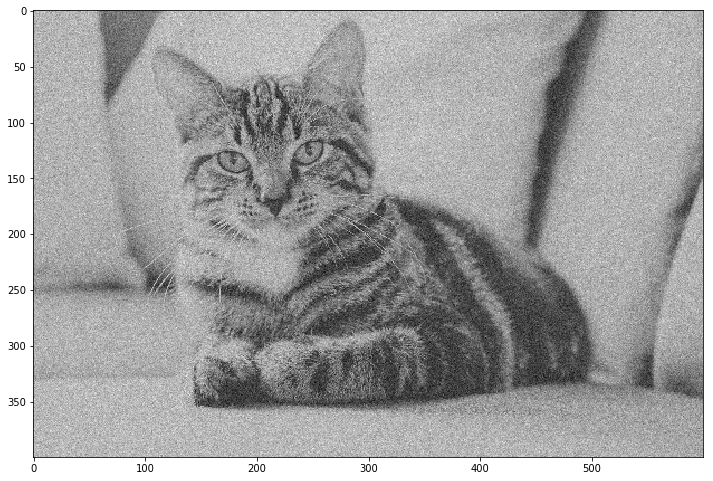

In [114]:
plt.figure(figsize=(12, 18))
plt.imshow(Bn, cmap='gray')

In [119]:
tv_denoising = TVDenoising(Bn)

In [120]:
tv_denoising.run(500, 0.01, 0.08, alpha)

tensor([[0.7911, 0.7910, 0.7910,  ..., 0.7458, 0.7457, 0.7458],
        [0.7910, 0.7911, 0.7911,  ..., 0.7458, 0.7457, 0.7458],
        [0.7910, 0.7910, 0.7910,  ..., 0.7458, 0.7457, 0.7458],
        ...,
        [0.7949, 0.7977, 0.7975,  ..., 0.6852, 0.6851, 0.6851],
        [0.7947, 0.7946, 0.7947,  ..., 0.6851, 0.6667, 0.6667],
        [0.7948, 0.7948, 0.7947,  ..., 0.6667, 0.6667, 0.6667]],
       device='cuda:0', grad_fn=<AddBackward0>)

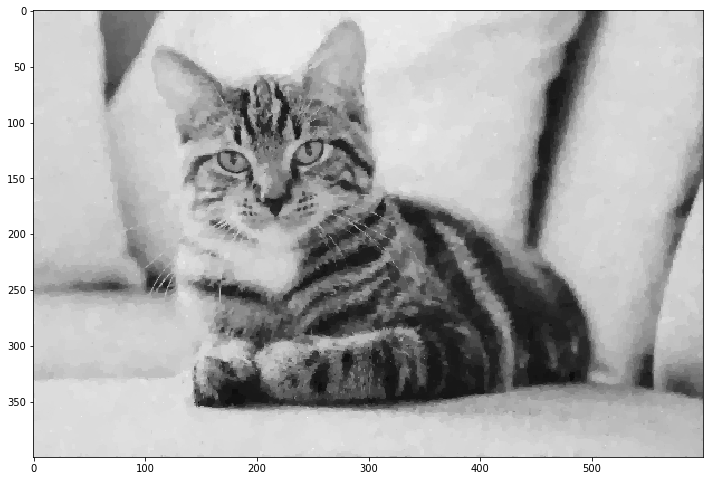

In [121]:
plt.figure(figsize=(12, 18))
plt.imshow(tv_denoising.x.cpu().detach(), cmap='gray')

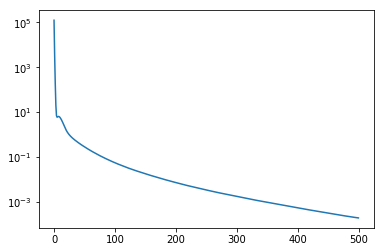

In [565]:
plt.plot(tv_denoising.p_diffs)
plt.yscale('log')

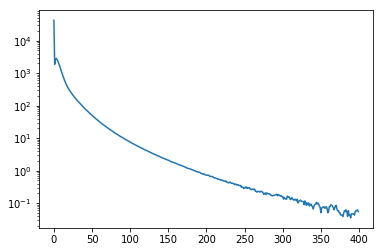

In [566]:
energies = (np.array(tv_denoising.energies)-min(tv_denoising.energies))[:-100]
plt.plot(energies)
plt.yscale('log')

In [568]:
print(torch.sum(torch.abs(tv_denoising.p) == 0.08).item())
print(torch.sum(torch.abs(tv_denoising.p) != 0.08).item())

153792
326208


In [569]:
tv_denoising.p

tensor([[[-0.0713,  0.0069],
         [-0.0116,  0.0649],
         [-0.0631, -0.0019],
         ...,
         [ 0.0241, -0.0702],
         [-0.0156, -0.0171],
         [-0.0800, -0.0533]],

        [[-0.0182,  0.0800],
         [-0.0467,  0.0800],
         [-0.0337,  0.0800],
         ...,
         [-0.0145, -0.0800],
         [-0.0456, -0.0400],
         [-0.0800, -0.0499]],

        [[-0.0312,  0.0746],
         [ 0.0770, -0.0418],
         [-0.0800, -0.0030],
         ...,
         [ 0.0800,  0.0374],
         [-0.0777, -0.0761],
         [-0.0800, -0.0552]],

        ...,

        [[ 0.0783, -0.0734],
         [ 0.0096, -0.0789],
         [-0.0753, -0.0792],
         ...,
         [-0.0497,  0.0181],
         [-0.0644,  0.0769],
         [-0.0800,  0.0772]],

        [[ 0.0418, -0.0800],
         [-0.0584, -0.0800],
         [-0.0404, -0.0800],
         ...,
         [-0.0486, -0.0800],
         [-0.0169, -0.0800],
         [-0.0800, -0.0800]],

        [[ 0.0117, -0.0800],
       

In [424]:
tv_denoising.x

tensor([[0.8779, 0.6409, 0.8004,  ..., 0.8414, 0.7368, 0.8374],
        [0.7720, 0.7269, 0.6097,  ..., 0.8144, 0.7535, 0.7704],
        [0.8212, 0.6815, 0.9309,  ..., 0.8012, 0.9129, 0.7469],
        ...,
        [0.7309, 0.9560, 0.9305,  ..., 0.6722, 0.6813, 0.6790],
        [0.7512, 0.9078, 0.8126,  ..., 0.7674, 0.6550, 0.8010],
        [0.7599, 0.7931, 0.9083,  ..., 0.6543, 0.5921, 0.5019]],
       grad_fn=<AddBackward0>)

In [425]:
tv_denoising.divergence(tv_denoising.p)

tensor([[ 0.0264, -0.0215, -0.0400,  ..., -0.0198, -0.0996, -0.0598],
        [ 0.0400, -0.0734, -0.0821,  ...,  0.0600, -0.0800, -0.0400],
        [-0.0064, -0.1232, -0.1000,  ...,  0.1398, -0.0604, -0.0402],
        ...,
        [-0.0300, -0.0701, -0.0901,  ...,  0.1400,  0.0186,  0.0000],
        [-0.0200,  0.0000,  0.0234,  ...,  0.0400, -0.1307, -0.0800],
        [-0.0100,  0.0350,  0.1000,  ..., -0.0200, -0.0800,  0.0200]],
       grad_fn=<AddBackward0>)

In [529]:
x = np.zeros([2, 2])

In [539]:
x[:, None, 0]

array([[0.],
       [0.]])